## This is a banking customer classification project 
#### The goal is to based on historical marketing data , develop a model to predict if the customer will agree to make a term deposit or not 

## EDA(Exploritory data analysis)

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Loading the dataset 
data = pd.read_csv('BankCustomerData.csv')
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
# View descriptive statistics of numberical data 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


In [53]:
# see aditional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [54]:
# Check for Null values 
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [55]:
# Check for duplicates 
data.duplicated().sum()


0

In [91]:
# Check unique values in categorical columns (not numerical)
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper())
        print('=====================================')
        print(data[column].unique() ,"\n\n\n")


JOB
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 



MARITAL
['married' 'single' 'divorced'] 



EDUCATION
['tertiary' 'secondary' 'unknown' 'primary'] 



DEFAULT
['no' 'yes'] 



HOUSING
['yes' 'no'] 



LOAN
['no' 'yes'] 



CONTACT
['unknown' 'cellular' 'telephone'] 



MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 



POUTCOME
['unknown' 'failure' 'other' 'success'] 



TERM_DEPOSIT
['no' 'yes'] 





## We can see that in some columns we have "unknown" , so we can treat them as NULLs. 

In [92]:
# Find all columns with nulls 
def unknown(data_frame):
    columns = data_frame.columns

    presence_list = []
    for i in columns:
        if 'unknown' in data_frame[i].unique():
            presence_list.append(i)
    return presence_list

unknowns = unknown(data)
unknowns

C:\Users\Admin\AppData\Local\Temp\ipykernel_15700\1448924819.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


['job', 'education', 'contact', 'poutcome']

In [93]:
for i in unknowns:
    precentage = len(data[data[i] == 'unknown']) /len(data[i]) * 100
    print(i.upper() , f'\n=========================================\n{str(precentage)}' + '%' '\n\n\n' )

JOB 
0.6191514810384858%



EDUCATION 
3.9635075869509135%



CONTACT 
29.963179249044302%



POUTCOME 
84.62909542906728%





# Since "poutcome" is missing in almost 85% of all records , we will leave unknown. It is also reasonabel to leave "unknown" in this column , because this customer could not participate in the last compaign.

In [94]:
#droppint missing values 
unknowns = unknown(data)
for i in unknowns[:3]:
    data.drop(data[data[i]  == 'unknown'].index, inplace = True )

C:\Users\Admin\AppData\Local\Temp\ipykernel_15700\1448924819.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


### Since our data has no Null values and no Duplicates we can move on and get better knowledge about each feature

In [95]:
# creating a function to see distribution of all features 
def plot_distributions(df):
    plt.figure(figsize=(28,40))
    b = 0 
    for i in df.columns:
        b+=1
        plt.subplot(6,6,b)
        plt.hist(df[i])
        plt.title(i)
        
# create function to visualize distribution of one feature 
def plot_idividual( column_name,df= data):
    plt.figure(figsize=(15,10))
    plt.hist(df[column_name])
    plt.title(column_name)

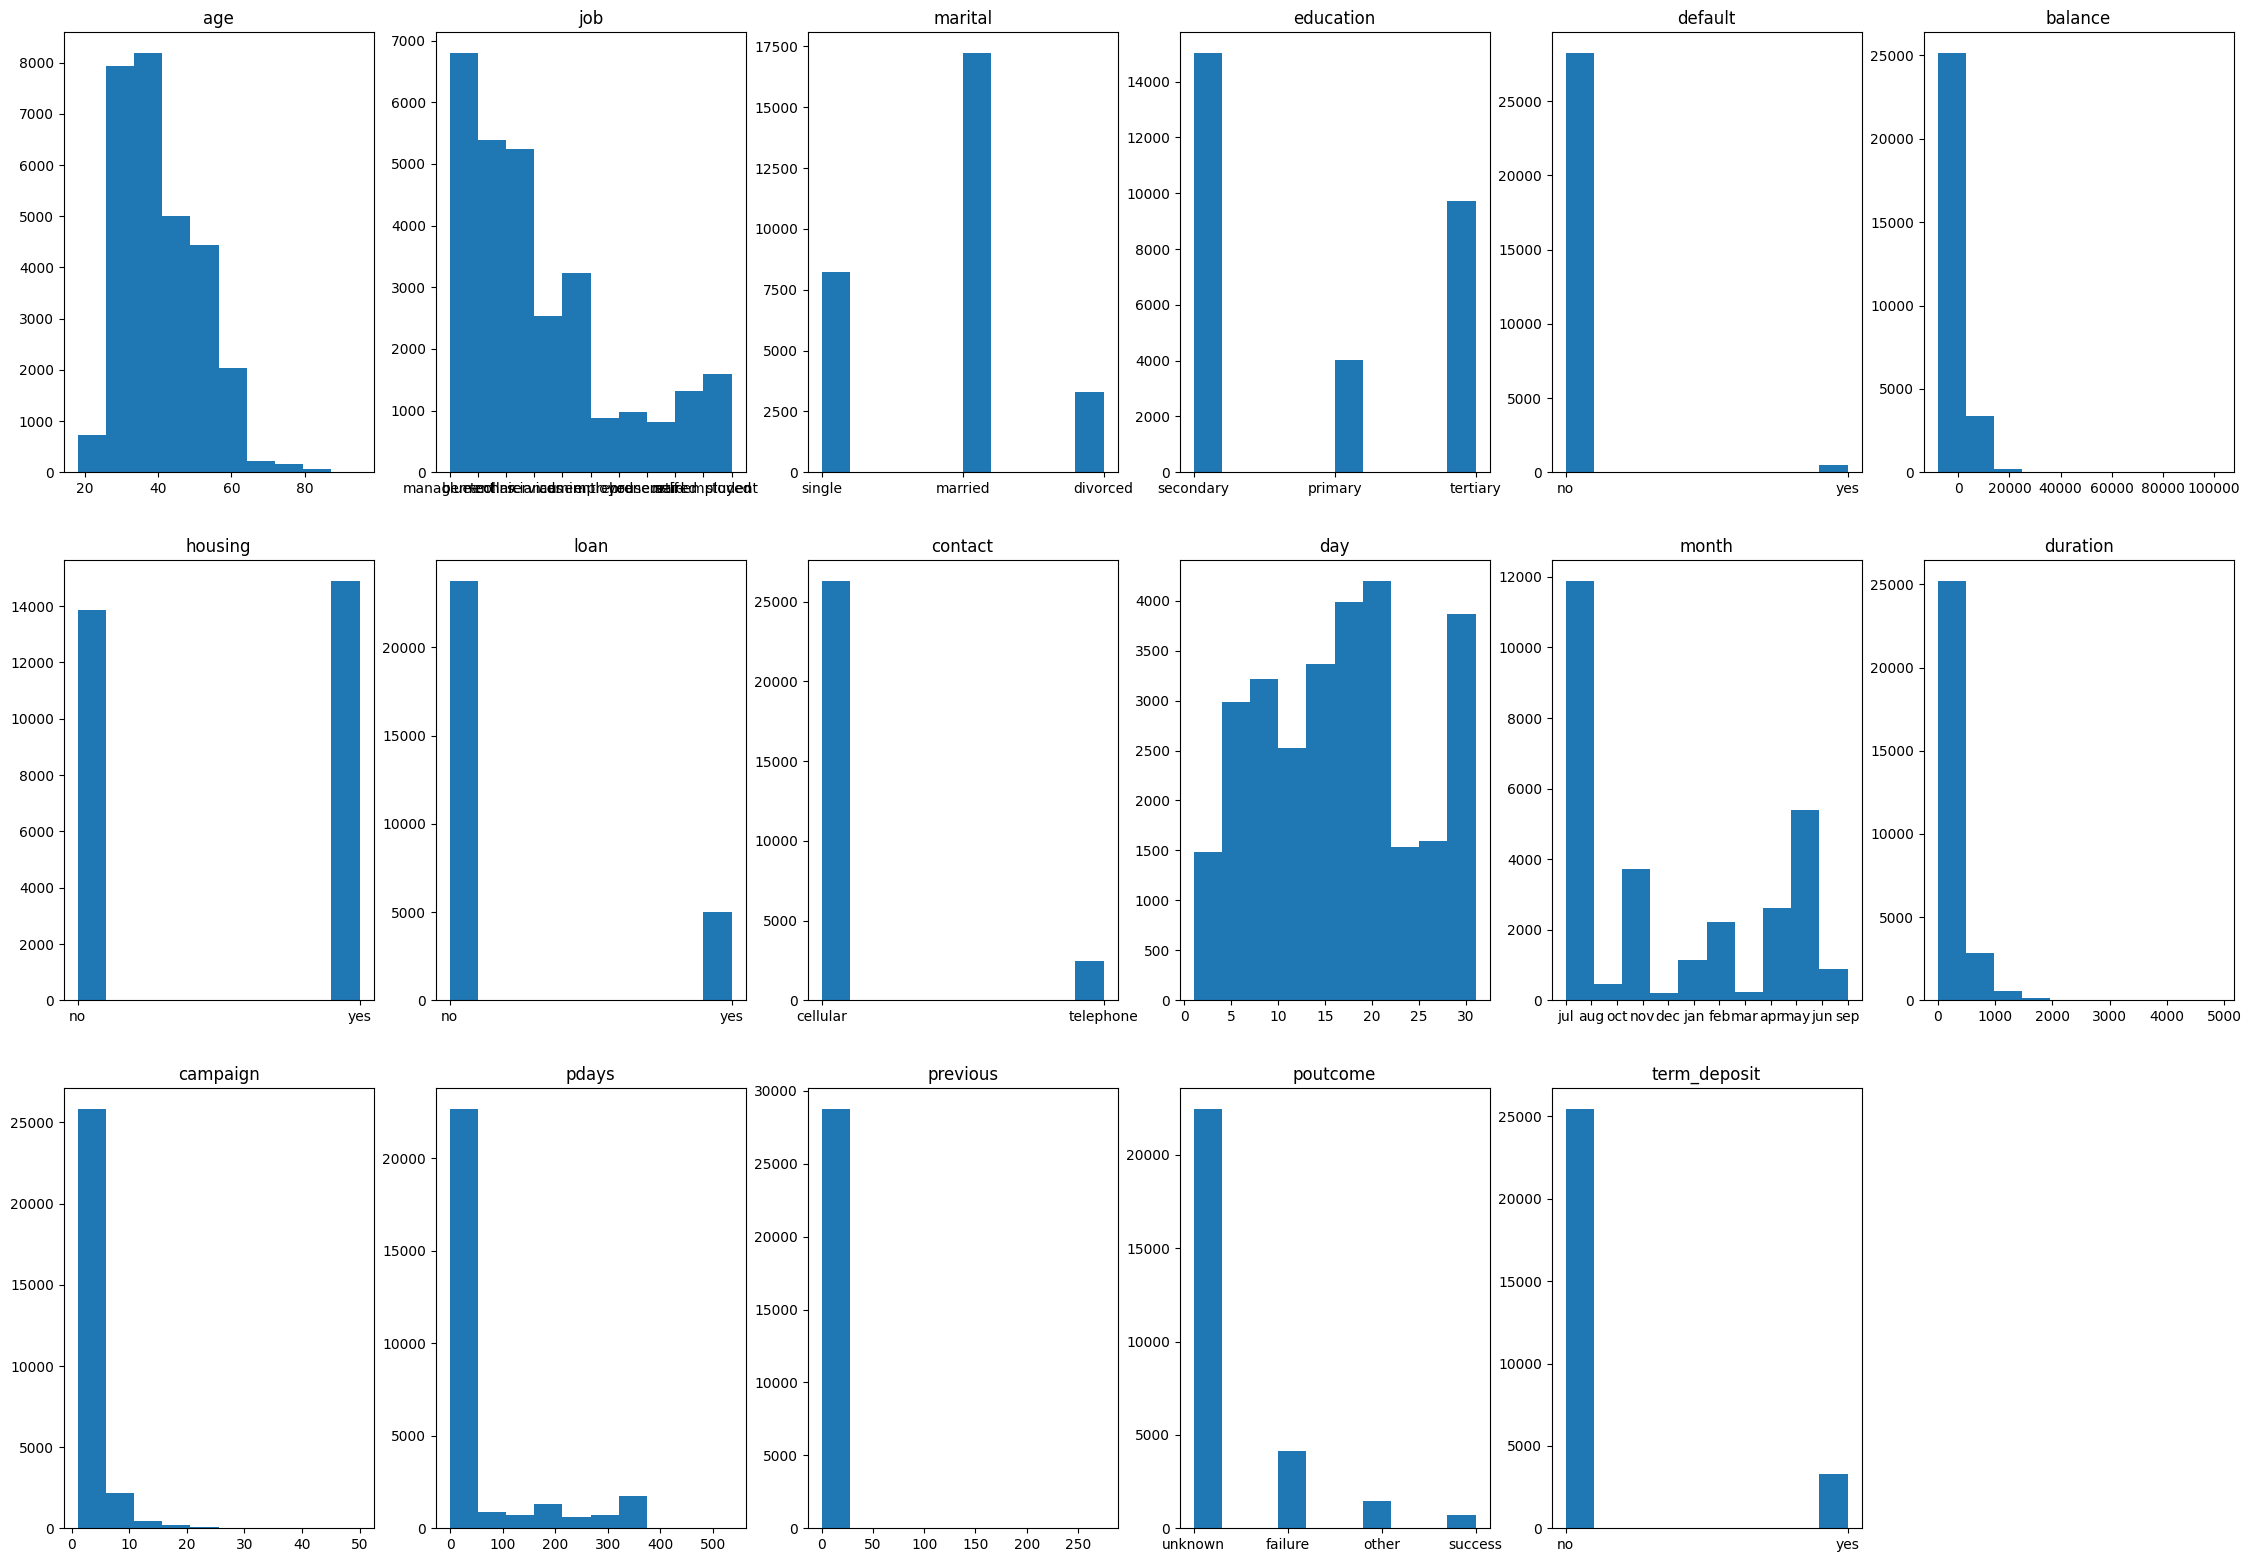

In [96]:
# Plot distibutio of features 
plot_distributions(data)

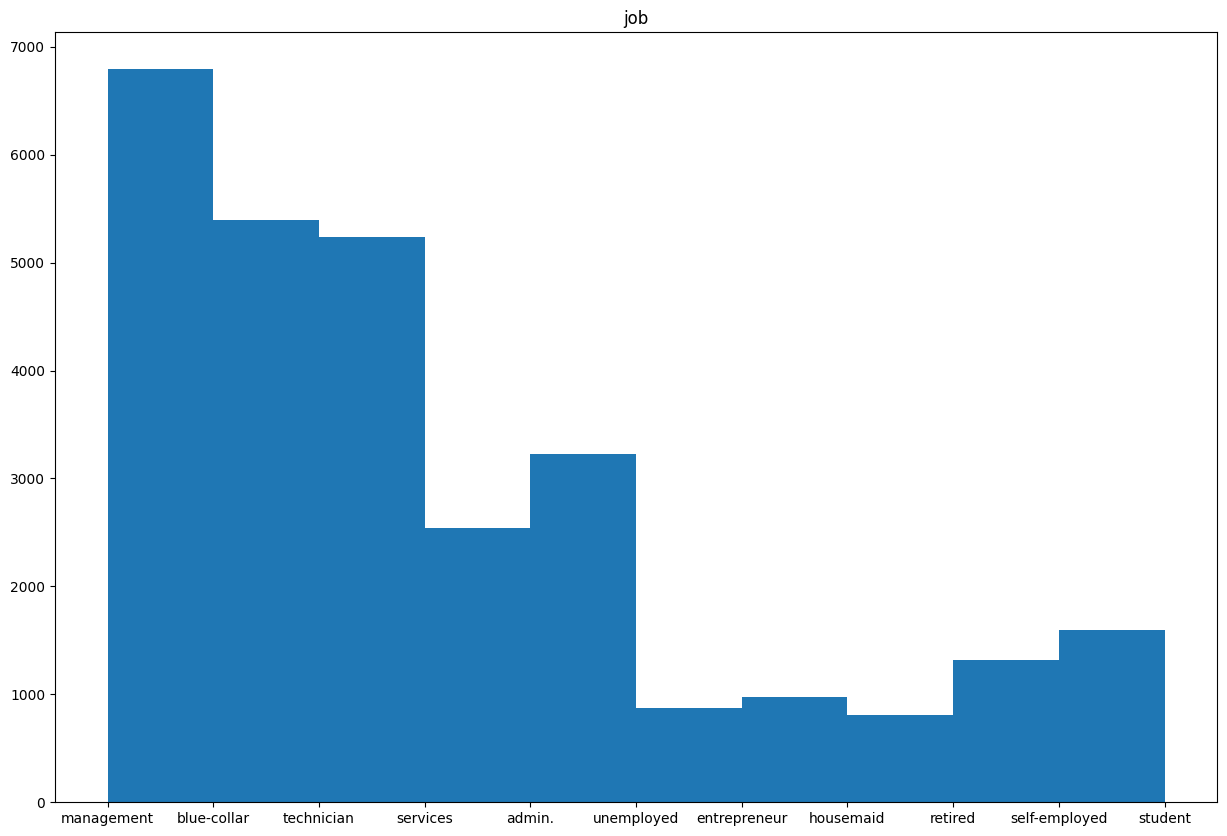

In [62]:
# Plot job feature to see it in more details 
plot_idividual('job')

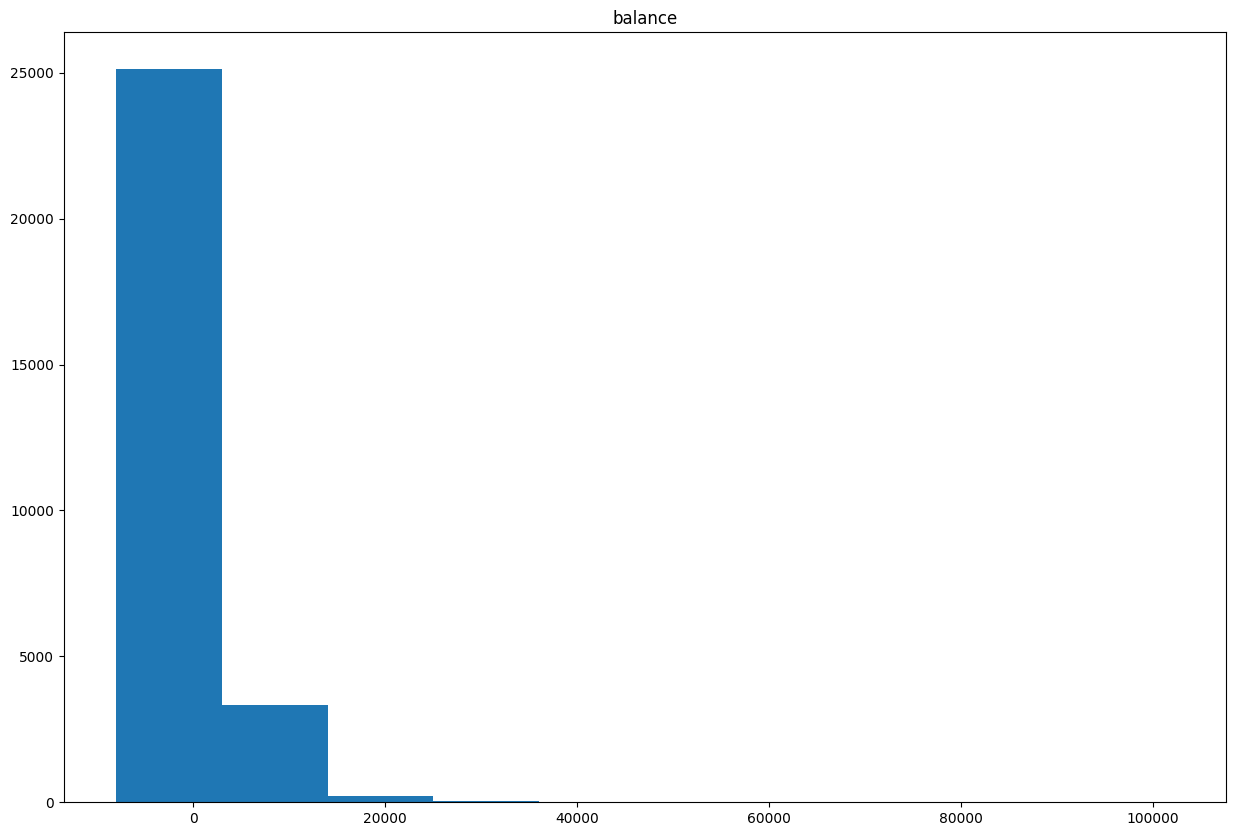

In [63]:
# plot balance to see it in more details 
plot_idividual('balance')


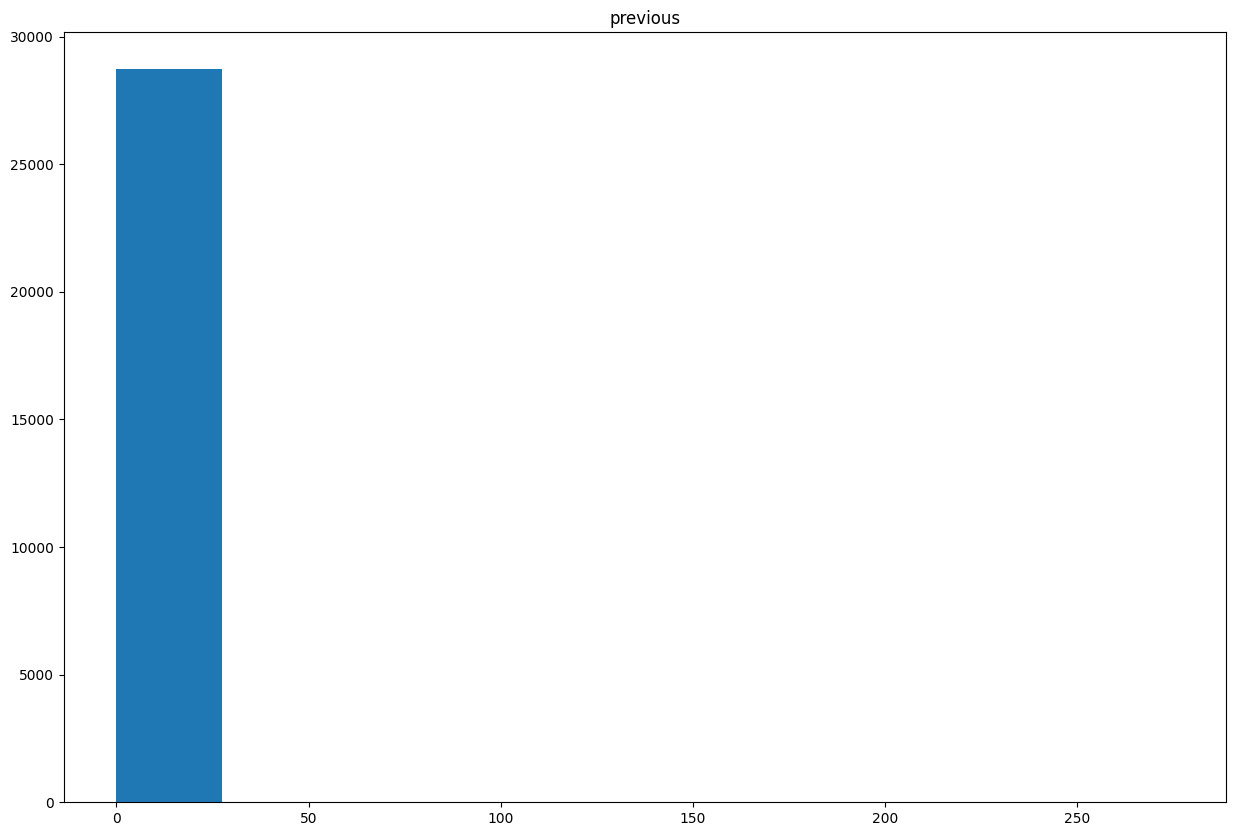

In [64]:
plot_idividual('previous')

In [65]:
# Get count of each value in term_deposit
term_deposit = np.array([len(data[data['term_deposit']== 'no']), len(data[data['term_deposit'] == 'yes'])])
mylabel = ['no','yes']
# Get precentage of each value 
myprec = np.array([str(round(term_deposit[0] / len(data['term_deposit']) * 100,2)) + '%', 
                    str(round(term_deposit[1] / len(data['term_deposit'])* 100,2)) + '%'])


Text(0.5, 1.0, 'Term deposit results')

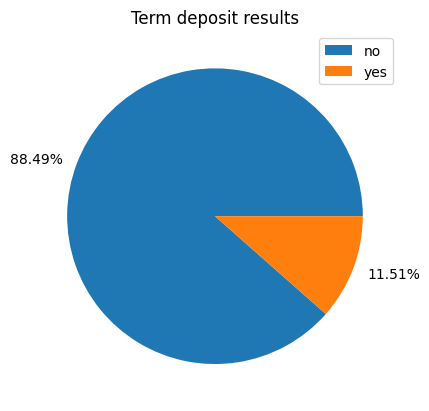

In [66]:
# Visualize yes & no distribution

plt.pie(term_deposit, labels = myprec)
plt.legend(mylabel)
plt.title('Term deposit results')


## From this histograms we can understand two things 
* ### Prediction label is not equely represented (90/10), which can lead to bad model performance 
* ### Labels : balance, duration, pdays, previous , campaign are higly skewed , which can also result in poor model performance 

## Data Preprocessing
### We will try two way of handling categorical data : one-hot encoding , label encoding 

In [98]:
# data preprocessing with one-hot encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# dataset balancing
data_positive = pd.DataFrame(data[data['term_deposit'] == 'yes'])
data_negative  = pd.DataFrame(data[data['term_deposit'] == 'no'][:len(data_positive)])

data_balanced = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

# Shuffle the data
data_shuffled =  data_balanced.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['term_deposit','duration'], axis = 1 )
y = pd.get_dummies(data_shuffled['term_deposit'])['yes']


def scale_one(X,y):
    # Create a column transformer  
    ct = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),['job','marital','education','default','housing','loan','contact','month','poutcome']),
        (MinMaxScaler(),['age','day']), # Transforms data in values between 0 and 1
        (StandardScaler(), ['balance','campaign','pdays', 'previous']),
        remainder = 'passthrough')# We use RobustScalar because we assume high level of outliers because of higly skewed data. It works with quartiles 

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    
    ct.fit(X_train)
    

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    print(X_train_transformed)
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test 

In [100]:
X_train_one, X_test_one, y_train_one, y_test_one = scale_one(X, y)

       0    1    2    3    4    5    6    7    8    9   ...   37   38   39  \
0     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5289  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5290  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
5292  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
5293  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

       40        41        42        43        44        45    

In [101]:
cor  =  X_train_one.corr()
cor.style.background_gradient('coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,1.000000,-0.178765,-0.071694,-0.069382,-0.208385,-0.102283,-0.073742,-0.122812,-0.055307,-0.165493,-0.063396,0.030545,-0.050862,0.033156,-0.119758,0.251942,-0.177780,0.020991,-0.020991,-0.048809,0.048809,-0.020582,0.020582,0.005856,-0.005856,0.000692,-0.038848,0.006019,-0.000686,-0.006142,0.009640,0.011026,0.006846,0.047735,-0.030851,-0.016988,-0.004967,0.024104,0.006134,0.025836,-0.036288,-0.078880,-0.011189,-0.029895,0.012536,0.034468,0.018189
1,-0.178765,1.000000,-0.087258,-0.084443,-0.253621,-0.124486,-0.089750,-0.149472,-0.067313,-0.201418,-0.077158,-0.030037,0.067372,-0.051412,0.314732,0.074428,-0.310132,-0.044496,0.044496,-0.065600,0.065600,-0.080035,0.080035,-0.040225,0.040225,-0.026554,-0.074405,-0.035568,-0.047417,-0.017864,0.132496,-0.042378,-0.051817,0.039697,-0.031075,-0.052184,-0.033339,-0.028793,-0.016026,-0.056662,0.064524,-0.047310,-0.039174,-0.048305,0.031424,-0.033559,-0.031232
2,-0.071694,-0.087258,1.000000,-0.033866,-0.101716,-0.049926,-0.035995,-0.059946,-0.026996,-0.080779,-0.030944,0.004028,0.054866,-0.062356,-0.015876,-0.043962,0.058078,-0.045121,0.045121,-0.020323,0.020323,-0.031673,0.031673,-0.005929,0.005929,-0.032851,-0.035395,-0.022577,-0.009171,-0.006564,0.080098,-0.012515,-0.018950,-0.023559,0.003470,-0.031725,-0.009542,-0.015751,-0.017002,-0.037472,0.043342,0.021400,-0.001687,-0.000962,0.033693,-0.033343,-0.016681
3,-0.069382,-0.084443,-0.033866,1.000000,-0.098435,-0.048315,-0.034834,-0.058013,-0.026125,-0.078174,-0.029946,0.005262,0.070718,-0.080422,0.226652,-0.080452,-0.081863,-0.003338,0.003338,-0.010128,0.010128,0.017690,-0.017690,-0.062218,0.062218,-0.017697,-0.021038,-0.003730,-0.029898,-0.017134,0.076519,-0.034256,-0.010097,-0.028839,-0.013110,0.008520,-0.024472,-0.027002,-0.029285,-0.021865,0.046027,0.073990,0.024012,-0.024157,0.019330,-0.037124,-0.035292
4,-0.208385,-0.253621,-0.101716,-0.098435,1.000000,-0.145112,-0.104621,-0.174238,-0.078466,-0.234791,-0.089942,-0.016151,-0.016136,0.029102,-0.168868,-0.458322,0.607964,0.020508,-0.020508,0.011553,-0.011553,0.050872,-0.050872,0.072528,-0.072528,0.024241,0.074474,-0.001294,0.009626,-0.017872,-0.085856,0.027700,0.052767,-0.031655,0.023320,0.011547,0.041781,0.028300,0.034821,0.038416,-0.060468,-0.050400,0.019834,0.070065,-0.008749,0.040236,0.022121
5,-0.102283,-0.124486,-0.049926,-0.048315,-0.145112,1.000000,-0.051351,-0.085522,-0.038514,-0.115244,-0.044147,0.107340,0.066556,-0.149316,0.148592,-0.045397,-0.061422,0.028698,-0.028698,0.168888,-0.168888,0.045953,-0.045953,-0.123164,0.123164,0.017706,0.048378,0.063399,0.051678,-0.001011,-0.112548,-0.008997,0.016855,-0.035672,0.019787,0.097319,0.072440,-0.015276,0.000114,0.021369,-0.004049,0.520679,0.022456,0.074668,-0.033633,0.003556,-0.005644
6,-0.073742,-0.089750,-0.035995,-0.034834,-0.104621,-0.051351,1.000000,-0.061658,-0.027767,-0.083086,-0.031828,-0.034144,0.010279,0.013413,-0.054667,-0.057489,0.100898,-0.007085,0.007085,0.003804,-0.003804,-0.003433,0.003433,0.018648,-0.018648,0.002217,-0.014810,-0.006104,-0.005556,0.014348,-0.009523,0.002601,0.009442,0.000562,0.033170,0.004424,-0.010672,-0.013568,-0.005293,0.026308,-0.006064,-0.020250,-0.009481,0.023240,-0.020519,-0.004374,-0.006119
7,-0.122812,-0.149472,-0.059946,-0.058013,-0.174238,-0.085522,-0.061658,1.000000,-0.046244,-0.138374,-0.053007,-0.007718,-0.016658,0.023603,-0.062806,0.230036,-0.196565,0.001942,-0.001942,-0.052265,0.052265,-0.043409,0.043409,0.004673,-0.004673,-0.032743,-0.050438,0.005041,-0.038961,0.025106,0.061397,-0.007265,-0.026627,0.032032,-0.010316,-0.010971,-0.028628,-0.002911,-0.002358,-0.015544,0.013420,-0.108911,-0.013079,-0.060790,0.010741,0.011694,0.007310
8,-0.055307,-0.067313,-0.026996,-0.026125,-0.078466,-0.038514,-0.027767,-0.046244,1.000000,-0.062315,-0.023871,-0.053657,-0.155921,0.207559,-0.024012,0.029094,-0.013037,0.011930,-0.011930,0.091413,-0.091413,0.074636,-0.074636,0

In [102]:
X_train_one = X_train_one.drop([18,20,22,24], axis = 1)
X_test_one = X_test_one.drop([18,20,22,24], axis = 1)

In [104]:
X_train_one.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46],
           dtype='int64')

In [122]:
# data preprocessing with label encoding 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# dataset balancing
data_positive = pd.DataFrame(data[data['term_deposit'] == 'yes'])
data_negative  = pd.DataFrame(data[data['term_deposit'] == 'no'][:len(data_positive)])

data_balanced = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

# Shuffle the data
data_shuffled =  data_balanced.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['term_deposit','duration'], axis = 1 )
y = pd.get_dummies(data_shuffled['term_deposit'])['yes']


def scale_label(X,y):
    # Create a column transformer 
    labelencoder = LabelEncoder()
    categorical  = ['job','marital','education','default','housing','loan','contact','month','poutcome']  # incode categorical data 
    for i in categorical:
        X[i] = labelencoder.fit_transform(X[i])
        
    
    ct = make_column_transformer(
        (MinMaxScaler(),['age','day']), # Transforms data in values between 0 and 1
        (StandardScaler(), ['balance','campaign','pdays', 'previous',]),
        remainder = 'passthrough')

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    
    ct.fit(X_train)
    

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    print(X_train_transformed)
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test 

In [123]:
X_train_removed, X_test_removed, y_train_removed, y_test_removed = scale_label(X, y)

            0         1         2         3         4         5    6    7   \
0     0.194805  0.633333  0.682689 -0.594648 -0.339806 -0.245327  4.0  1.0   
1     0.207792  0.900000 -0.089972 -0.594648 -0.339806 -0.245327  9.0  1.0   
2     0.467532  0.466667  0.006732  0.229561  2.158149  1.601252  1.0  1.0   
3     0.532468  0.400000 -0.417277 -0.594648 -0.339806 -0.245327  3.0  1.0   
4     0.090909  0.233333 -0.416631 -0.594648 -0.339806 -0.245327  7.0  2.0   
...        ...       ...       ...       ...       ...       ...  ...  ...   
5289  0.428571  0.800000 -0.417277  0.229561 -0.339806 -0.245327  1.0  1.0   
5290  0.363636  0.666667 -0.352269 -0.594648 -0.339806 -0.245327  3.0  1.0   
5291  0.155844  0.633333  2.096701 -0.594648 -0.339806 -0.245327  1.0  2.0   
5292  0.285714  0.300000  1.219250 -0.182544  0.929425  0.370199  1.0  1.0   
5293  0.311688  0.666667 -0.358414 -0.182544 -0.339806 -0.245327  7.0  2.0   

       8    9    10   11   12    13   14  
0     2.0  0.0  0.0 

In [107]:
# See corelation between different variables 
cor  = X_train_removed.corr()
cor.style.background_gradient('coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.015228,0.100813,0.007054,0.007602,-0.007289,-0.008214,-0.422964,-0.163056,-0.007082,-0.145457,-0.020476,0.192435,-0.003660,0.002495
1,-0.015228,1.000000,0.018279,0.073635,-0.011438,-0.023409,0.034537,0.005418,0.048553,-0.012079,0.049851,-0.070795,-0.008256,-0.082110,0.010630
2,0.100813,0.018279,1.000000,0.008448,0.071969,0.063547,0.021281,0.028922,0.081364,-0.069307,-0.072154,-0.121083,0.060655,0.011124,-0.085546
3,0.007054,0.073635,0.008448,1.000000,-0.083367,-0.057275,-0.037995,-0.028556,-0.033723,0.000579,-0.003137,0.024184,0.107218,-0.065175,0.097880
4,0.007602,-0.011438,0.071969,-0.083367,1.000000,0.511825,-0.007614,0.021382,0.033478,-0.038220,0.086390,-0.092353,-0.037984,0.112614,-0.820277
5,-0.007289,-0.023409,0.063547,-0.057275,0.511825,1.000000,0.019056,0.027004,0.027014,-0.032498,0.024986,-0.067868,-0.028355,0.074898,-0.552036
6,-0.008214,0.034537,0.021281,-0.037995,-0.007614,0.019056,1.000000,0.056105,0.167470,-0.020554,-0.066137,-0.085062,-0.053601,-0.048666,-0.011889
7,-0.422964,0.005418,0.028922,-0.028556,0.021382,0.027004,0.056105,1.000000,0.130885,-0.000383,-0.042968,-0.042775,-0.048028,-0.011270,-0.037595
8,-0.163056,0.048553,0.081364,-0.033723,0.033478,0.027014,0.167470,0.130885,1.000000,-0.037865,-0.013938,-0.093956,-0.146387,-0.035027,-0.066035
9,-0.007082,-0.012079,-0.069307,0.000579,-0.038220,-0.032498,-0.020554,-0.000383,-0.037865,1.000000,-0.018127,0.116752,-0.021824,0.004670,0.044268


In [82]:
X_train_removed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.688312,0.200000,0.461435,-0.598522,-0.343585,-0.249475,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,0.259740,0.966667,-0.229606,-0.598522,-0.343585,-0.249475,9.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
2,0.246753,0.700000,0.102501,-0.598522,-0.197361,3.372245,7.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0
3,0.064935,0.166667,-0.126035,0.653385,-0.343585,-0.249475,7.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
4,0.103896,0.500000,-0.433353,-0.598522,-0.343585,-0.249475,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,0.142857,0.466667,-0.369512,-0.181220,-0.343585,-0.249475,7.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
5290,0.181818,0.333333,-0.246924,-0.598522,-0.343585,-0.249475,6.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0
5291,0.090909,0.200000,-0.393622,-0.181220,-0.343585,-0.249475,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
5292,0.220779,0.966667,-0.026878,-0.598522,-0.343585,-0.249475,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0


#### Columns 14 and 4 are highly corilated , but we will first try to predict with them , to then see the diferance 

In [70]:
import tensorflow as tf

In [71]:
# Create a confusion matrix visualization

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)


def plot_confusion(y_test,y_pred):

    y_pred = tf.constant(y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_test,tf.round(y_pred))
    cm_normal = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    n_classes = cm.shape[0]

    #prettifying 
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes 
    classes = False

    if classes:
        labels = classes 
    else:
        labels = np.arange(cm.shape[0])



    #label the axes 
    ax.set(title = 'Confusion matrix',
            xlabel = 'Predicted label',
            ylabel = 'True label',
            xticks = np.arange(n_classes),
            yticks  = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    # Set x-axis labels to the bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors 
    threshold = (cm.max() + cm.min()) / 2 

    # Plot the text on each cell 
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f'{cm[i,j]}({cm_normal[i,j]*100:.1f}%)',
                horizontalalignment = 'center',
                color  = 'white' if cm[i,j] > threshold else "black",
                size = 15),

In [72]:
# Create a function to evaluate models perforamnce 
def model_evaluate(model, history,X_test ,y_test):
    # Make a model prediction
    y_pred = model.predict(X_test)
    
    # See model preforamance 
    model_result  = str(round(model.evaluate(X_test,y_test)[1], 3)) + '%'
    print(f'Model prediction score is: {model_result} \n')

    # Plot the learning curve 
    pd.DataFrame(history.history).plot()

    # Plot confustion matrix 
    plot_confusion(y_test, y_pred)

## Model_1 NN (Label encoding )

In [124]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.00005),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10 , min_delta=0.0001)


# Fit the model
history_1  = model_1.fit(X_train_removed,
                        y_train_removed,
                        epochs = 3000,
                        validation_data = (X_test_removed, y_test_removed),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


166/166 [==============================] - 2s 6ms/step - loss: 0.7349 - accuracy: 0.5281 - precision_10: 0.6711 - recall_10: 0.1132 - val_loss: 0.7058 - val_accuracy: 0.5763 - val_precision_10: 0.7195 - val_recall_10: 0.2416
Epoch 2/3000
166/166 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6105 - precision_10: 0.7755 - recall_10: 0.3127 - val_loss: 0.6641 - val_accuracy: 0.6903 - val_precision_10: 0.8899 - val_recall_10: 0.4301
Epoch 3/3000
166/166 [==============================] - 1s 5ms/step - loss: 0.6497 - accuracy: 0.7235 - precision_10: 0.8944 - recall_10: 0.5077 - val_loss: 0.6239 - val_accuracy: 0.7719 - val_precision_10: 0.9320 - val_recall_10: 0.5836
Epoch 4/3000
166/166 [==============================] - 1s 4ms/step - loss: 0.6137 - accuracy: 0.7629 - precision_10: 0.9175 - recall_10: 0.5786 - val_loss: 0.5887 - val_accuracy: 0.7772 - val_precision_10: 0.9504 - val_recall_10: 0.5821
Epoch 5/3000
166/166 [==============================] - 1s 4m

42/42 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9539 - precision_8: 0.9983 - recall_8: 0.9090
Model prediction score is: 0.954% 



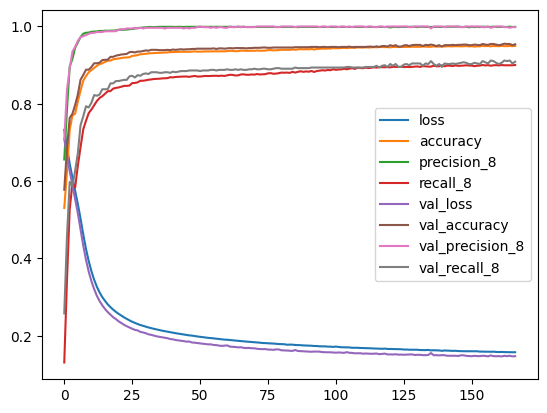

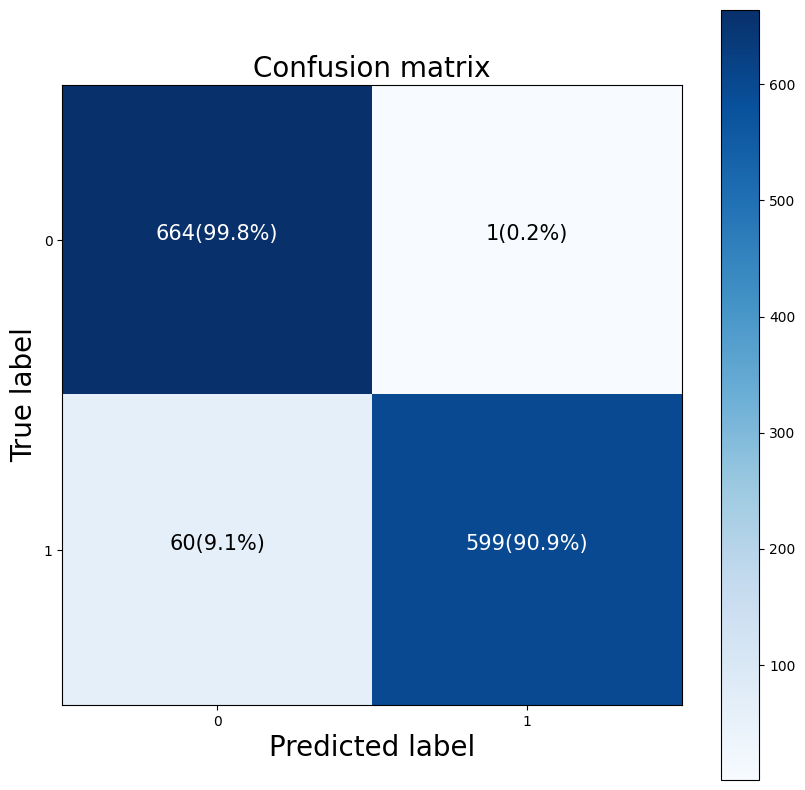

In [117]:
model_evaluate(model_1, history_1, X_test_removed, y_test_removed)

## Model_2 NN (One-hot encoding)

In [128]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.00005),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10 , min_delta=0.0001)


# Fit the model
history_2  = model_2.fit(X_train_one,
                        y_train_one,
                        epochs = 3000,
                        validation_data = (X_test_one, y_test_one),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


166/166 [==============================] - 2s 7ms/step - loss: 0.6997 - accuracy: 0.5465 - precision_12: 0.6157 - recall_12: 0.2354 - val_loss: 0.6813 - val_accuracy: 0.6231 - val_precision_12: 0.7953 - val_recall_12: 0.3511
Epoch 2/3000
166/166 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.7195 - precision_12: 0.8884 - recall_12: 0.4989 - val_loss: 0.6361 - val_accuracy: 0.7923 - val_precision_12: 0.9425 - val_recall_12: 0.6311
Epoch 3/3000
166/166 [==============================] - 1s 4ms/step - loss: 0.5980 - accuracy: 0.8559 - precision_12: 0.9689 - recall_12: 0.7339 - val_loss: 0.5685 - val_accuracy: 0.8829 - val_precision_12: 0.9779 - val_recall_12: 0.7881
Epoch 4/3000
166/166 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.9192 - precision_12: 0.9812 - recall_12: 0.8538 - val_loss: 0.4909 - val_accuracy: 0.9116 - val_precision_12: 0.9861 - val_recall_12: 0.8385
Epoch 5/3000
166/166 [==============================] - 1s 3m

42/42 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9275 - precision_9: 1.0000 - recall_9: 0.8578
Model prediction score is: 0.927% 



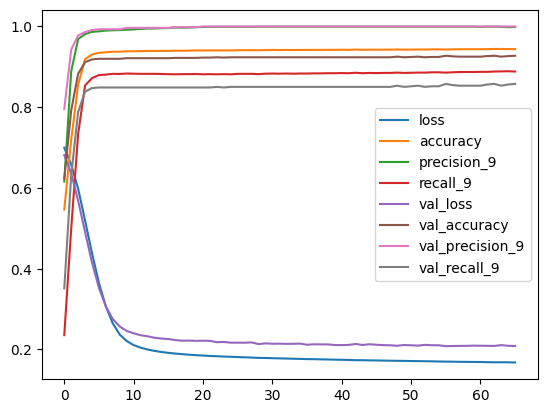

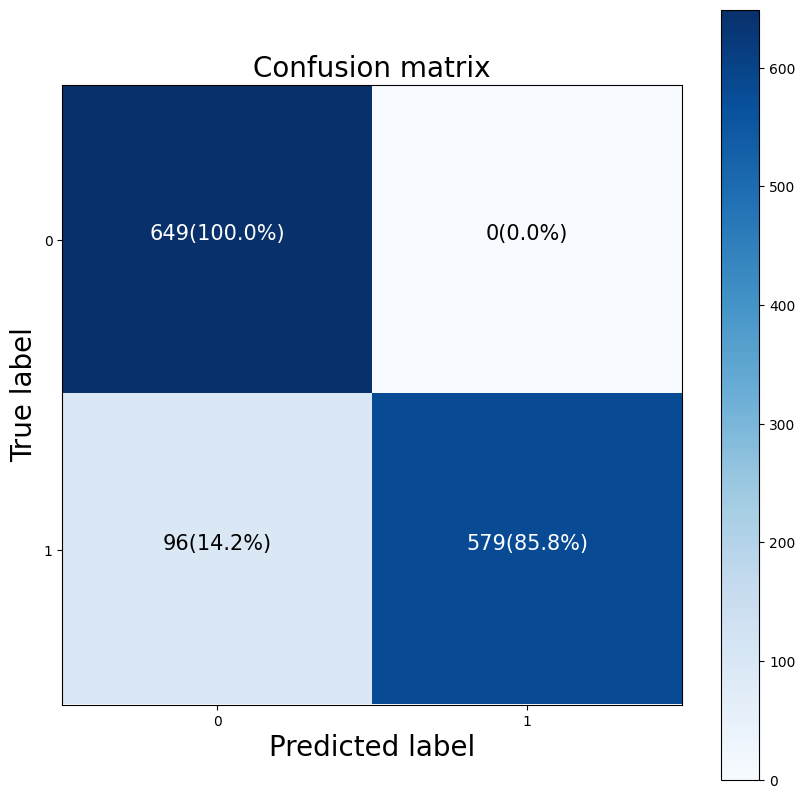

In [121]:
model_evaluate(model_2, history_2, X_test_one, y_test_one)

## Since the model with label encoding performed much better let's now try to remove higly corelated column №14

In [131]:
cor = X_test_removed.corr()
cor.style.background_gradient('coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.010753,0.114319,0.035846,0.025894,-0.011446,-0.007572,-0.429277,-0.151813,-0.016882,-0.152806,-0.010444,0.170794,-0.023492,-0.007359
1,0.010753,1.000000,0.053453,0.106633,0.029177,0.019052,-0.010342,0.029213,0.065314,-0.038631,0.029421,-0.098410,0.032670,-0.083169,-0.031003
2,0.114319,0.053453,1.000000,-0.017054,0.095330,0.079865,0.026011,0.047189,0.098466,-0.093222,-0.067282,-0.163517,0.063401,-0.028223,-0.137396
3,0.035846,0.106633,-0.017054,1.000000,-0.067936,-0.065384,-0.026920,-0.031383,-0.056669,-0.016564,-0.020814,0.003709,0.086451,-0.083468,0.095023
4,0.025894,0.029177,0.095330,-0.067936,1.000000,0.527902,0.023367,0.041668,0.020158,-0.025957,0.065278,-0.113303,-0.005354,0.105469,-0.800401
5,-0.011446,0.019052,0.079865,-0.065384,0.527902,1.000000,0.023217,0.060998,0.051196,-0.034412,-0.007347,-0.098834,0.004151,0.062649,-0.563260
6,-0.007572,-0.010342,0.026011,-0.026920,0.023367,0.023217,1.000000,0.055475,0.145433,-0.055486,-0.049837,-0.080949,-0.073552,-0.030130,-0.029062
7,-0.429277,0.029213,0.047189,-0.031383,0.041668,0.060998,0.055475,1.000000,0.145555,-0.000147,-0.056874,-0.038368,-0.053309,-0.025095,-0.061531
8,-0.151813,0.065314,0.098466,-0.056669,0.020158,0.051196,0.145433,0.145555,1.000000,-0.074133,-0.012395,-0.059710,-0.099526,-0.023954,-0.046124
9,-0.016882,-0.038631,-0.093222,-0.016564,-0.025957,-0.034412,-0.055486,-0.000147,-0.074133,1.000000,0.000759,0.089687,-0.046997,-0.025973,0.033310


In [132]:
# Now lets remove 14's column and see if it will effect performance of the model
X_train_dropped = X_train_removed.drop(4, axis = 1)
X_test_dropped = X_test_removed.drop(4, axis = 1)

In [133]:
# Set the seed 
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.00005),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Make ealry stopping callback 

ec = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10 , min_delta=0.0001)


# Fit the model
history_3  = model_3.fit(X_train_dropped,
                        y_train_removed,
                        epochs = 3000,
                        validation_data = (X_test_dropped, y_test_removed),
                        callbacks = [ec])

Epoch 1/3000


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


166/166 [==============================] - 2s 6ms/step - loss: 0.7048 - accuracy: 0.4601 - precision_15: 0.4650 - recall_15: 0.5179 - val_loss: 0.6953 - val_accuracy: 0.5227 - val_precision_15: 0.5163 - val_recall_15: 0.6246
Epoch 2/3000
166/166 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5682 - precision_15: 0.5566 - recall_15: 0.6771 - val_loss: 0.6725 - val_accuracy: 0.6110 - val_precision_15: 0.5940 - val_recall_15: 0.6869
Epoch 3/3000
166/166 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6615 - precision_15: 0.6556 - recall_15: 0.6828 - val_loss: 0.6349 - val_accuracy: 0.7538 - val_precision_15: 0.7882 - val_recall_15: 0.6900
Epoch 4/3000
166/166 [==============================] - 1s 5ms/step - loss: 0.6111 - accuracy: 0.8054 - precision_15: 0.8782 - recall_15: 0.7099 - val_loss: 0.5883 - val_accuracy: 0.8301 - val_precision_15: 0.9539 - val_recall_15: 0.6915
Epoch 5/3000
166/166 [==============================] - 1s 3m

42/42 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9562 - precision_15: 0.9983 - recall_15: 0.9134
Model prediction score is: 0.956% 



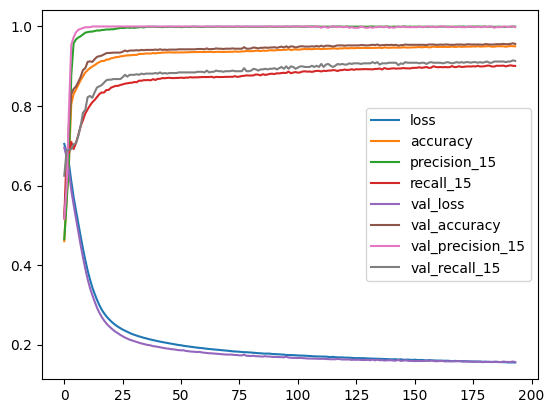

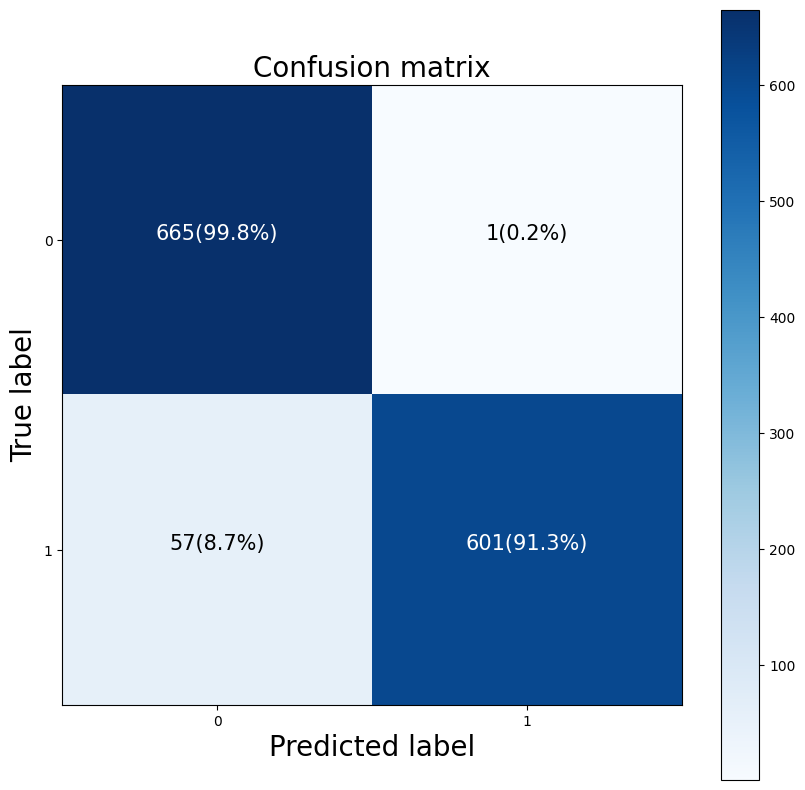

In [134]:
model_evaluate(model_3, history_3, X_test_dropped, y_test_removed)

# Trying other Machine Learning algorithms 

## Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =10, criterion='entropy', random_state=0)
classifier.fit(X_train_removed, y_train_removed)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [147]:
score = classifier.score(X_test_removed,y_test_removed)

prediction = classifier.predict(X_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.9645015105740181
[[665   1]
 [ 46 612]]


## SVC

In [148]:
from sklearn.svm import SVC

clf_with_filtered_data = SVC(kernel='rbf')
clf_with_filtered_data.fit(X_train_removed, y_train_removed)

SVC()

In [149]:
score = clf_with_filtered_data.score(X_test_removed,y_test_removed)

prediction = clf_with_filtered_data.predict(X_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.9131419939577039
[[666   0]
 [115 543]]


## Logistic regression 

In [150]:
from sklearn.linear_model import LogisticRegression

clm = LogisticRegression(max_iter = 1000,class_weight = 'balanced').fit(X_train_removed,y_train_removed)
prediction = clm.predict(X_test_removed)

In [151]:
score = clm.score(X_test_removed,y_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.7681268882175226
[[562 104]
 [203 455]]


## So by the end of this project we created machine learning models to predict if the customer will accept term deposit or not. The best performance showed Nueral Network and Random Forest algorithms, with 95% and 96% respectively